In [1]:
# Importing required Libraries
import pandas as pd 
import seaborn as sns
from sklearn. model_selection import train_test_split, GridSearchCV 
from sklearn. linear_model import LogisticRegression 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

# Ignoring the warning messages
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Read the label data from Excel
# Bringing only the 2nd column from the 'aggregateRockData.xlsx'
label_data = pd.read_excel('aggregateRockData.xlsx', usecols = [1], header = None)
label_data.columns = ['rock category']

# Read the feature data from the text file
# Bringing only coulumns 4 to 22
feature_data = pd.read_csv('norm540.txt', delimiter='\t', usecols = range(3, 22), header = None)
feature_data.columns = ['Porphyritic texture',
    'Presence of holes',
    'Salient green hue',
    'Pegmatitic texture',
    'Conchoidal fracture',
    'Angular fragments',
    'Rounded fragments',
    'Straight stripes',
    'Curved stripes',
    'Physical layers',
    'Veins',
    'Oily/shimmery texture',
    'Splotchy texture',
    'Single trans lucent crystal',
    'Multiple cubic crystals',
    'Sandy texture',
    'Fragments (disjunctive)',
    'Stripes (disjunctive)',
    'Crystals (disjunctive)'
    ]

In [3]:
#Joining the label_data & feature_data to make a new datafile
datafile = feature_data.join(label_data)

## Question 1
- Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require?

In [4]:
# Displaying number of rows and columns of the feature dataset
print(f"Number of Rows: {feature_data.shape[0]}")
print(f"Number of Columns: {feature_data.shape[1]}")

Number of Rows: 540
Number of Columns: 19


In [5]:
# Basic statistical summary of the feature dataset
feature_data.describe()

,Porphyritic texture,Presence of holes,Salient green hue,Pegmatitic texture,Conchoidal fracture,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single trans lucent crystal,Multiple cubic crystals,Sandy texture,Fragments (disjunctive),Stripes (disjunctive),Crystals (disjunctive)
count,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02
mean,-1.851852e-09,9.629630e-08,5.370370e-08,-6.296296e-08,-4.074074e-08,-1.537037e-07,-1.666667e-08,-1.814815e-07,-1.481481e-08,-1.166667e-07,-1.629630e-07,1.703704e-07,-6.851852e-08,-5.555556e-09,3.388889e-07,1.203704e-07,-1.148148e-07,-1.759259e-07,3.018519e-07
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01
min,-1.321491e+00,-4.076230e-01,-1.187950e+00,-1.322715e+00,-1.248012e+00,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-7.591280e-01,-5.121600e-01,-5.406530e-01,-8.468870e-01,-2.279220e-01,-2.250450e-01,-6.859370e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01
25%,-8.236470e-01,-4.076230e-01,-7.615050e-01,-8.046310e-01,-6.991450e-01,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-7.591280e-01,-5.121600e-01,-5.406530e-01,-8.468870e-01,-2.279220e-01,-2.250450e-01,-6.859370e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01
50%,-3.009100e-01,-4.076230e-01,-3.751970e-01,-1.829290e-01,-2.715380e-01,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-2.991730e-01,-5.121600e-01,-5.406530e-01,-2.490840e-01,-2.279220e-01,-2.250450e-01,-4.011240e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01
75%,7.644770e-01,-1.596880e-01,5.843033e-01,5.769290e-01,3.571070e-01,-1.820210e-01,-1.450180e-01,-3.523860e-01,-2.602240e-01,3.907600e-01,-1.384200e-02,-1.658870e-01,3.487180e-01,-2.279220e-01,-2.250450e-01,1.685000e-01,1.042300e-02,-2.072980e-01,-3.104190e-01
max,2.422299e+00,4.551072e+00,2.750390e+00,4.175892e+00,3.813059e+00,4.643652e+00,4.798130e+00,4.888957e+00,5.862693e+00,3.610446e+00,8.457556e+00,3.207009e+00,4.832237e+00,7.120010e+00,7.986072e+00,5.010309e+00,3.137369e+00,3.629722e+00,5.216791e+00


In [6]:
# Checking for any Null/NA values in the feature dataset.
feature_data.isna().sum()

Porphyritic texture            0
Presence of holes              0
Salient green hue              0
Pegmatitic texture             0
Conchoidal fracture            0
Angular fragments              0
Rounded fragments              0
Straight stripes               0
Curved stripes                 0
Physical layers                0
Veins                          0
Oily/shimmery texture          0
Splotchy texture               0
Single trans lucent crystal    0
Multiple cubic crystals        0
Sandy texture                  0
Fragments (disjunctive)        0
Stripes (disjunctive)          0
Crystals (disjunctive)         0
dtype: int64

array([[<Axes: title={'center': 'Porphyritic texture'}>,
        <Axes: title={'center': 'Presence of holes'}>,
        <Axes: title={'center': 'Salient green hue'}>,
        <Axes: title={'center': 'Pegmatitic texture'}>],
       [<Axes: title={'center': 'Conchoidal fracture'}>,
        <Axes: title={'center': 'Angular fragments'}>,
        <Axes: title={'center': 'Rounded fragments'}>,
        <Axes: title={'center': 'Straight stripes'}>],
       [<Axes: title={'center': 'Curved stripes'}>,
        <Axes: title={'center': 'Physical layers'}>,
        <Axes: title={'center': 'Veins'}>,
        <Axes: title={'center': 'Oily/shimmery texture'}>],
       [<Axes: title={'center': 'Splotchy texture'}>,
        <Axes: title={'center': 'Single trans lucent crystal'}>,
        <Axes: title={'center': 'Multiple cubic crystals'}>,
        <Axes: title={'center': 'Sandy texture'}>],
       [<Axes: title={'center': 'Fragments (disjunctive)'}>,
        <Axes: title={'center': 'Stripes (disjunctive

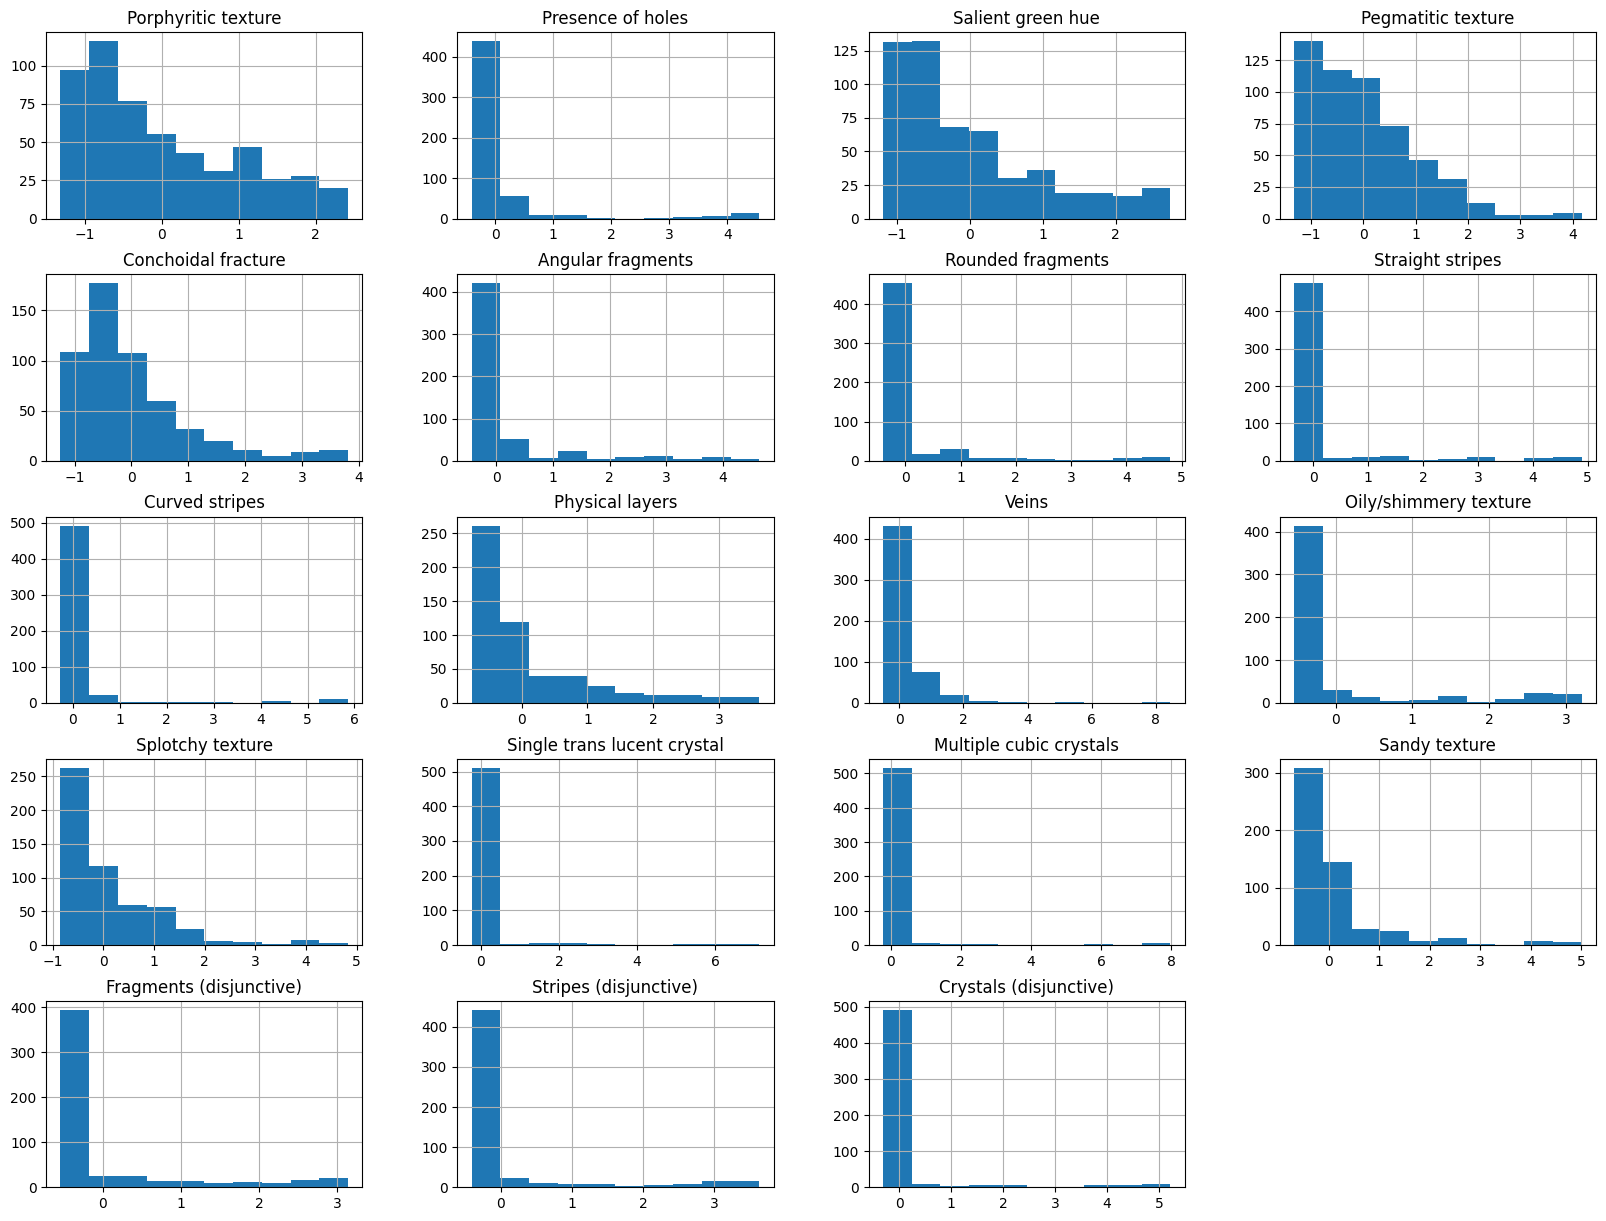

In [7]:
# Plotting the histogram of all the attributes of the feature dataset
feature_data.hist(grid=True,figsize=(20,15))

## Answer 1
- We have displayed basic statistical summary of th entire dataset.
- There are no Null or NA values present in the dataset so no special treatment required for any attributes.

## Question 2
- Analyze and discuss the relationships between the data attributes, and between the data attributes and label.
- This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

In [8]:
# Correlation Matrix of entire dataset
datafile.corr(method="pearson")

,Porphyritic texture,Presence of holes,Salient green hue,Pegmatitic texture,Conchoidal fracture,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single trans lucent crystal,Multiple cubic crystals,Sandy texture,Fragments (disjunctive),Stripes (disjunctive),Crystals (disjunctive),rock category
Porphyritic texture,1.000000,0.017601,0.255830,0.534070,-0.505542,0.645724,0.653319,-0.117642,-0.026782,-0.490498,-0.189307,-0.310966,0.373241,-0.163897,0.046817,-0.226060,0.819815,-0.108380,-0.086319,-0.305296
Presence of holes,0.017601,1.000000,-0.026329,-0.199425,-0.248047,-0.026176,-0.026623,-0.112504,-0.086442,-0.210501,-0.155518,-0.154314,-0.098999,-0.082330,-0.044729,0.283791,-0.035854,-0.132162,-0.087471,-0.301462
Salient green hue,0.255830,-0.026329,1.000000,0.126113,-0.189701,0.064291,0.186064,-0.061815,0.006080,-0.050614,-0.033938,-0.131127,0.089565,-0.168250,0.011505,-0.072024,0.169734,-0.042696,-0.109629,-0.104748
Pegmatitic texture,0.534070,-0.199425,0.126113,1.000000,0.055266,0.450381,0.321181,-0.081682,0.006070,-0.334001,-0.099182,0.180904,0.141837,0.128090,0.237183,-0.442259,0.498259,-0.055575,0.243675,-0.164925
Conchoidal fracture,-0.505542,-0.248047,-0.189701,0.055266,1.000000,-0.210173,-0.260734,-0.019918,0.058211,0.275226,0.058838,0.641196,-0.240125,0.075173,-0.088640,-0.196296,-0.293316,0.018864,-0.002322,0.103781
Angular fragments,0.645724,-0.026176,0.064291,0.450381,-0.210173,1.000000,0.260913,-0.137379,-0.103715,-0.229081,-0.130497,-0.152724,0.055986,-0.086229,-0.027110,-0.164748,0.783714,-0.161878,-0.078127,-0.123388
Rounded fragments,0.653319,-0.026623,0.186064,0.321181,-0.260734,0.260913,1.000000,-0.125969,-0.084503,-0.236336,-0.143923,-0.136893,0.009402,-0.090216,-0.045775,-0.133824,0.794627,-0.143357,-0.093649,0.009450
Straight stripes,-0.117642,-0.112504,-0.061815,-0.081682,-0.019918,-0.137379,-0.125969,1.000000,0.178444,0.006392,0.055417,-0.102114,-0.140431,-0.014729,-0.071865,0.106271,-0.168211,0.805348,-0.055964,0.086923
Curved stripes,-0.026782,-0.086442,0.006080,0.006070,0.058211,-0.103715,-0.084503,0.178444,1.000000,-0.125805,0.043942,-0.069111,-0.116719,-0.055039,-0.057039,-0.076266,-0.120035,0.715588,-0.076533,-0.016680
Physical layers,-0.490498,-0.210501,-0.050614,-0.334001,0.275226,-0.229081,-0.236336,0.006392,-0.125805,1.000000,0.074632,0.179334,-0.301661,-0.095277,-0.136120,-0.051544,-0.297611,-0.062761,-0.156928,0.262855


<Axes: >

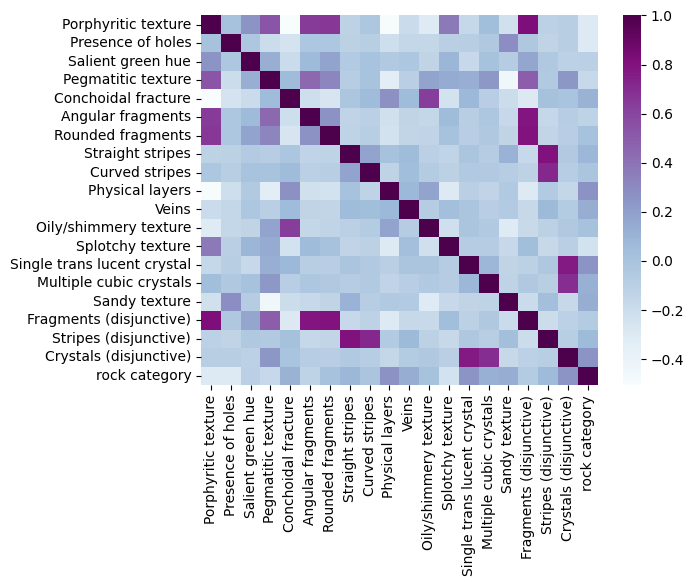

In [9]:
# # Plotting heatmap of PCC for all attributes with each other.
sns.heatmap(datafile.corr(method="pearson"), annot = False, cmap="BuPu")

In [10]:
# Finding the Correlation for every attribute with the label i.e. 'rock category'
correlation_matrix = round(feature_data.corrwith(label_data['rock category']), 4)
print(correlation_matrix)

Porphyritic texture           -0.3053
Presence of holes             -0.3015
Salient green hue             -0.1047
Pegmatitic texture            -0.1649
Conchoidal fracture            0.1038
Angular fragments             -0.1234
Rounded fragments              0.0094
Straight stripes               0.0869
Curved stripes                -0.0167
Physical layers                0.2629
Veins                          0.1301
Oily/shimmery texture          0.0077
Splotchy texture              -0.2429
Single trans lucent crystal    0.2535
Multiple cubic crystals        0.1212
Sandy texture                  0.1322
Fragments (disjunctive)       -0.0680
Stripes (disjunctive)          0.0618
Crystals (disjunctive)         0.2584
dtype: float64


In [11]:
# Finding attributes that are positively correlated
i = -1
columns = feature_data.columns
for correlation in correlation_matrix:
    i = i + 1
    if correlation > 0:
        print(f"{columns[i]:<30}: {correlation:.4f}")

Conchoidal fracture           : 0.1038
Rounded fragments             : 0.0094
Straight stripes              : 0.0869
Physical layers               : 0.2629
Veins                         : 0.1301
Oily/shimmery texture         : 0.0077
Single trans lucent crystal   : 0.2535
Multiple cubic crystals       : 0.1212
Sandy texture                 : 0.1322
Stripes (disjunctive)         : 0.0618
Crystals (disjunctive)        : 0.2584


In [12]:
# Finding attributes that are negatively correlated
i = -1
for correlation in correlation_matrix:
    i = i + 1
    if correlation < 0:
        print(f"{columns[i]:<30}: {correlation:.4f}")

Porphyritic texture           : -0.3053
Presence of holes             : -0.3015
Salient green hue             : -0.1047
Pegmatitic texture            : -0.1649
Angular fragments             : -0.1234
Curved stripes                : -0.0167
Splotchy texture              : -0.2429
Fragments (disjunctive)       : -0.0680


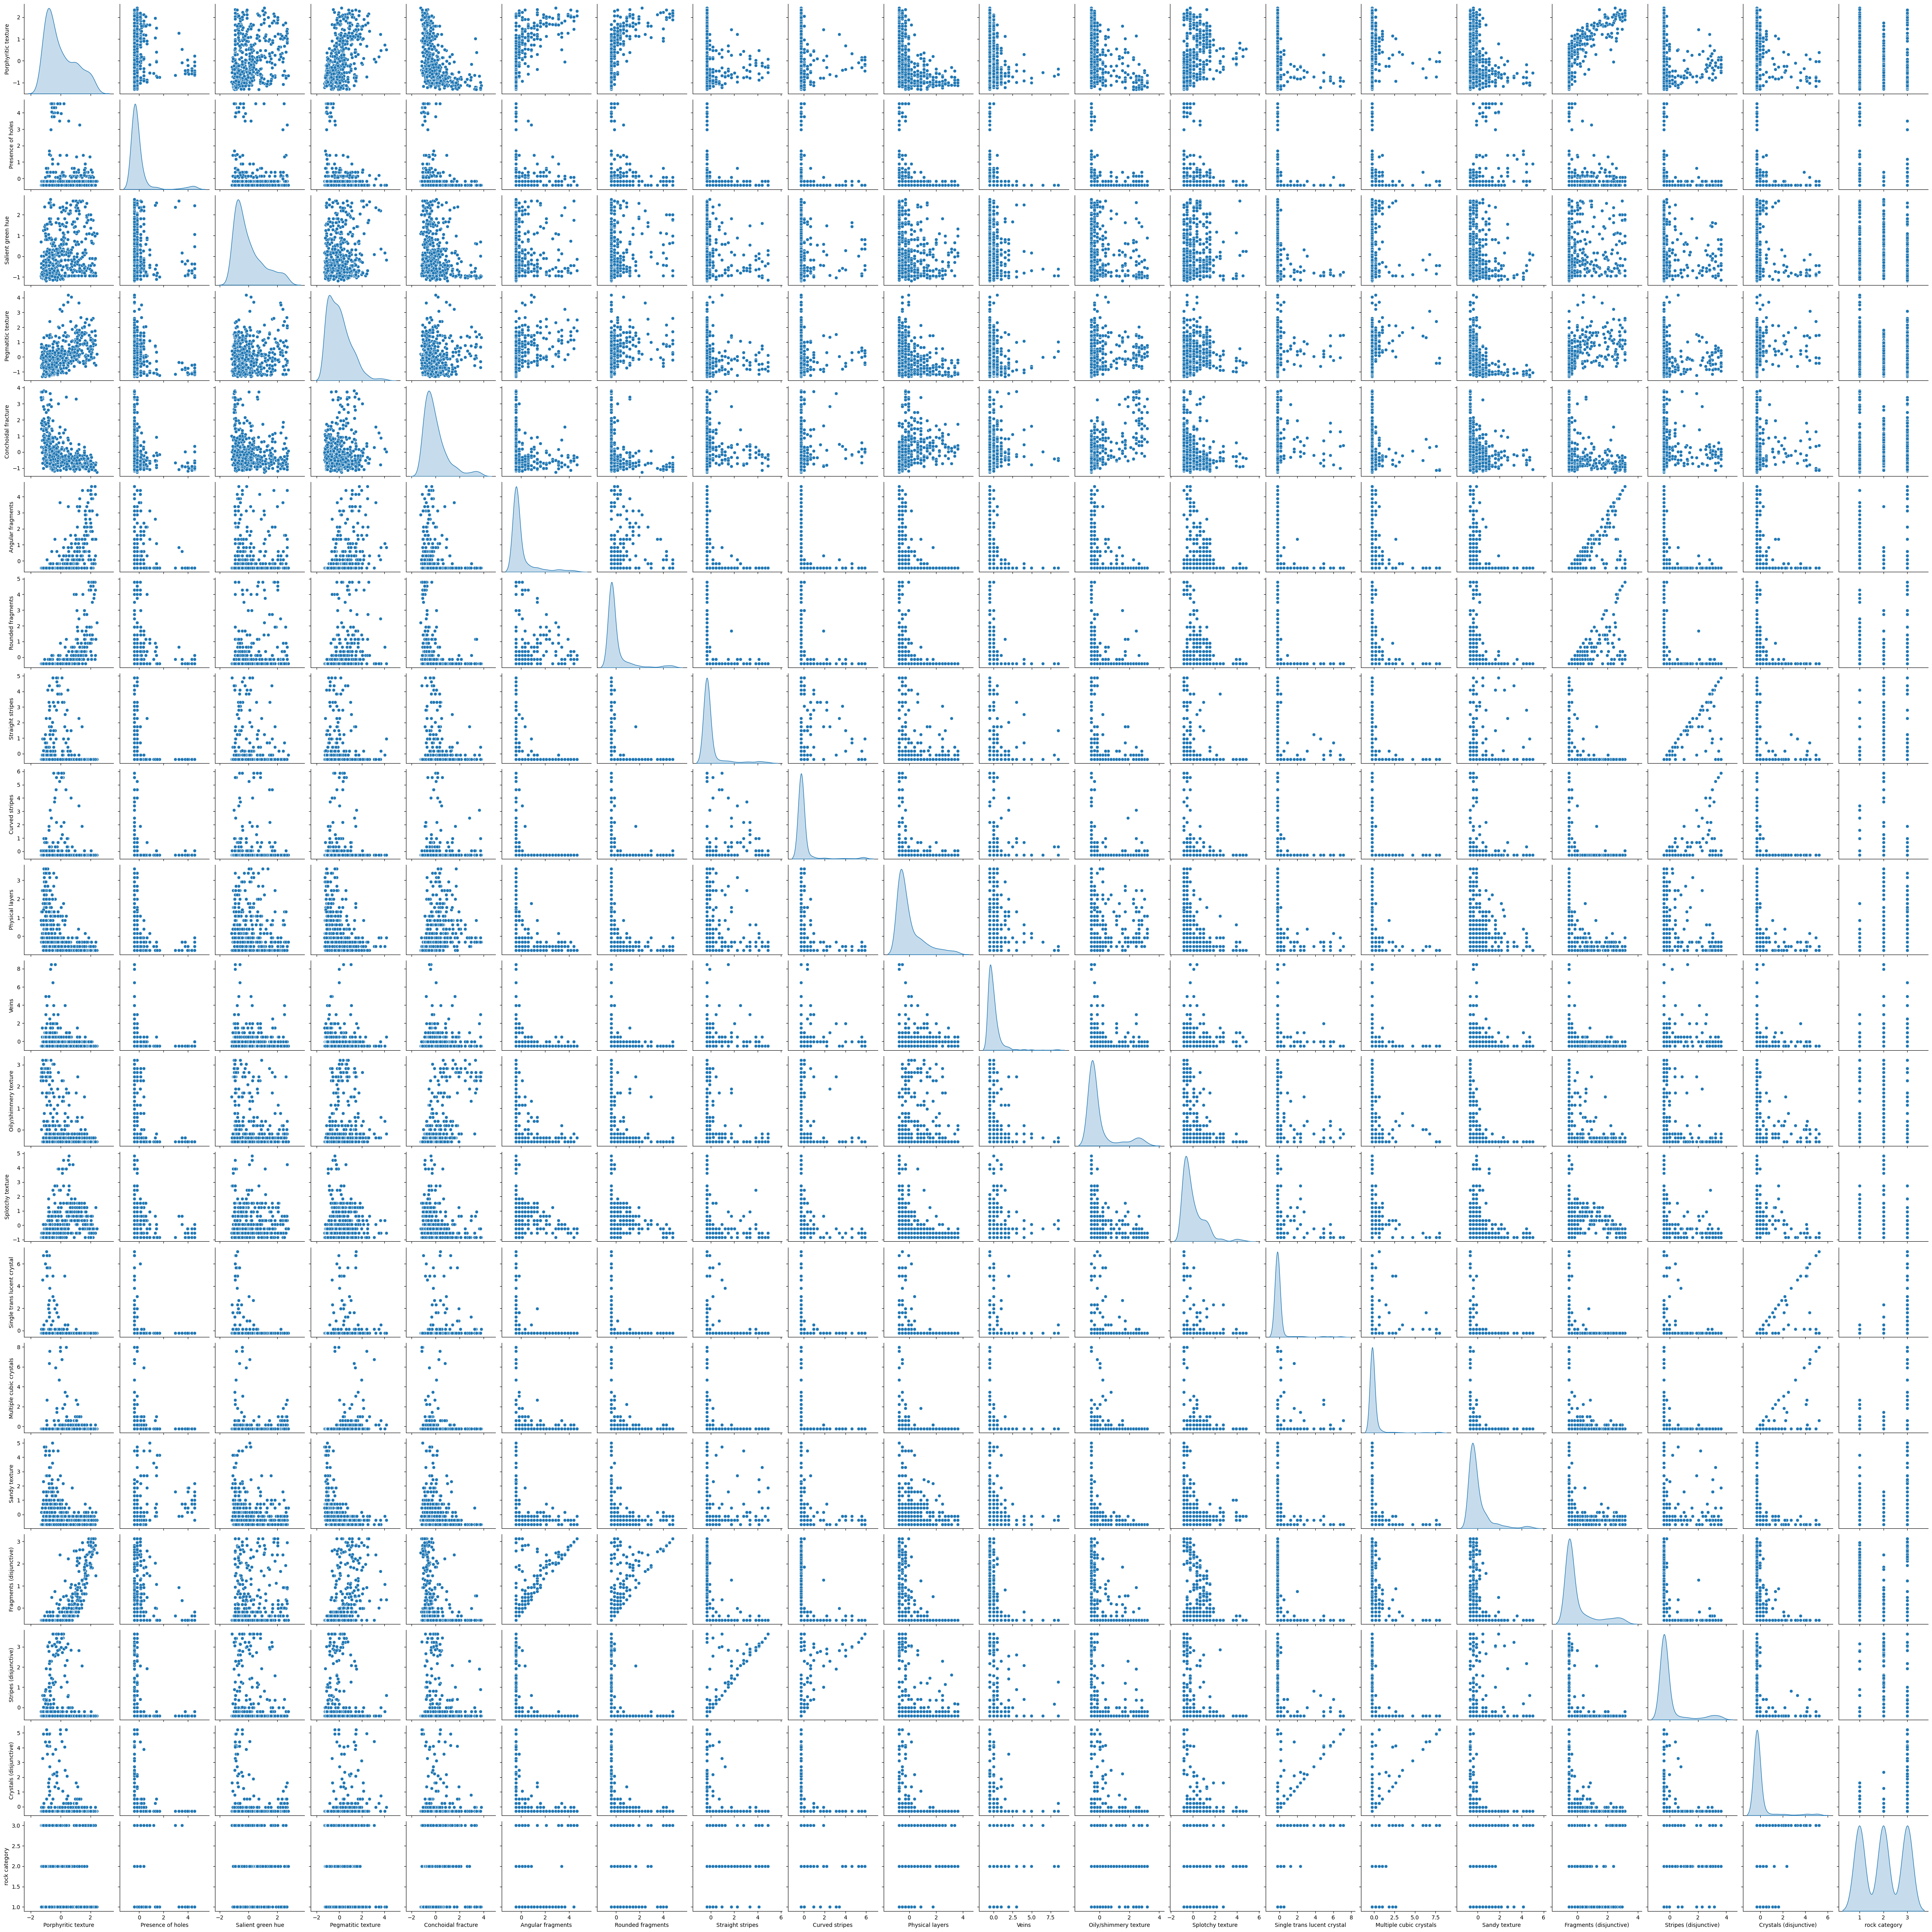

In [13]:
# Generating Scatter Plots of the attributes with each other
sns.pairplot(datafile, diag_kind="kde")

## Answer 2 
- The columns 'Porphyritic texture', 'Presence of holes', 'Salient green hue', 'Pegmatitic texture', 'Angular fragments', 'Curved  stripes', 'Splotchy texture', 'Fragments (disjunctive)' are negatively correlated to the label: <b>'rock category'</b>.
- The columsns 'Conchoidal fracture', 'Rounded fragments', 'Straight stripes', 'Physical layers', 'Veins', 'Oily/shimmery texture', 'Single trans lucent crystal', 'Multiple cubic crystals', 'Sandy texture', 'Stripes (disjunctive)', 'Crystals (disjunctive)' are positively correlated to the label: <b>'rock category'</b>.
- As we can see in the PCC Matrix <b>'rock category'</b> has the highest correlation with <b>'Porphyritic texture'</b>. Although it is negative Magnitude wise it is the largest.

## Question 3
- Selecting 20% of the data for testing and 20% for validation and use the remaining 60% of the data for training. Describing the data split through various visualizations.

In [14]:
# Splitting data into 60% training and 40% temp
X_train, X_temp, y_train, y_temp = train_test_split(feature_data, label_data, test_size=0.4, random_state=42)

# Splitting data into test & validation based of the 40% Temp data
# Splitting data into 50% testing and 50% validation
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

array([[<Axes: title={'center': 'Porphyritic texture'}>,
        <Axes: title={'center': 'Presence of holes'}>,
        <Axes: title={'center': 'Salient green hue'}>,
        <Axes: title={'center': 'Pegmatitic texture'}>],
       [<Axes: title={'center': 'Conchoidal fracture'}>,
        <Axes: title={'center': 'Angular fragments'}>,
        <Axes: title={'center': 'Rounded fragments'}>,
        <Axes: title={'center': 'Straight stripes'}>],
       [<Axes: title={'center': 'Curved stripes'}>,
        <Axes: title={'center': 'Physical layers'}>,
        <Axes: title={'center': 'Veins'}>,
        <Axes: title={'center': 'Oily/shimmery texture'}>],
       [<Axes: title={'center': 'Splotchy texture'}>,
        <Axes: title={'center': 'Single trans lucent crystal'}>,
        <Axes: title={'center': 'Multiple cubic crystals'}>,
        <Axes: title={'center': 'Sandy texture'}>],
       [<Axes: title={'center': 'Fragments (disjunctive)'}>,
        <Axes: title={'center': 'Stripes (disjunctive

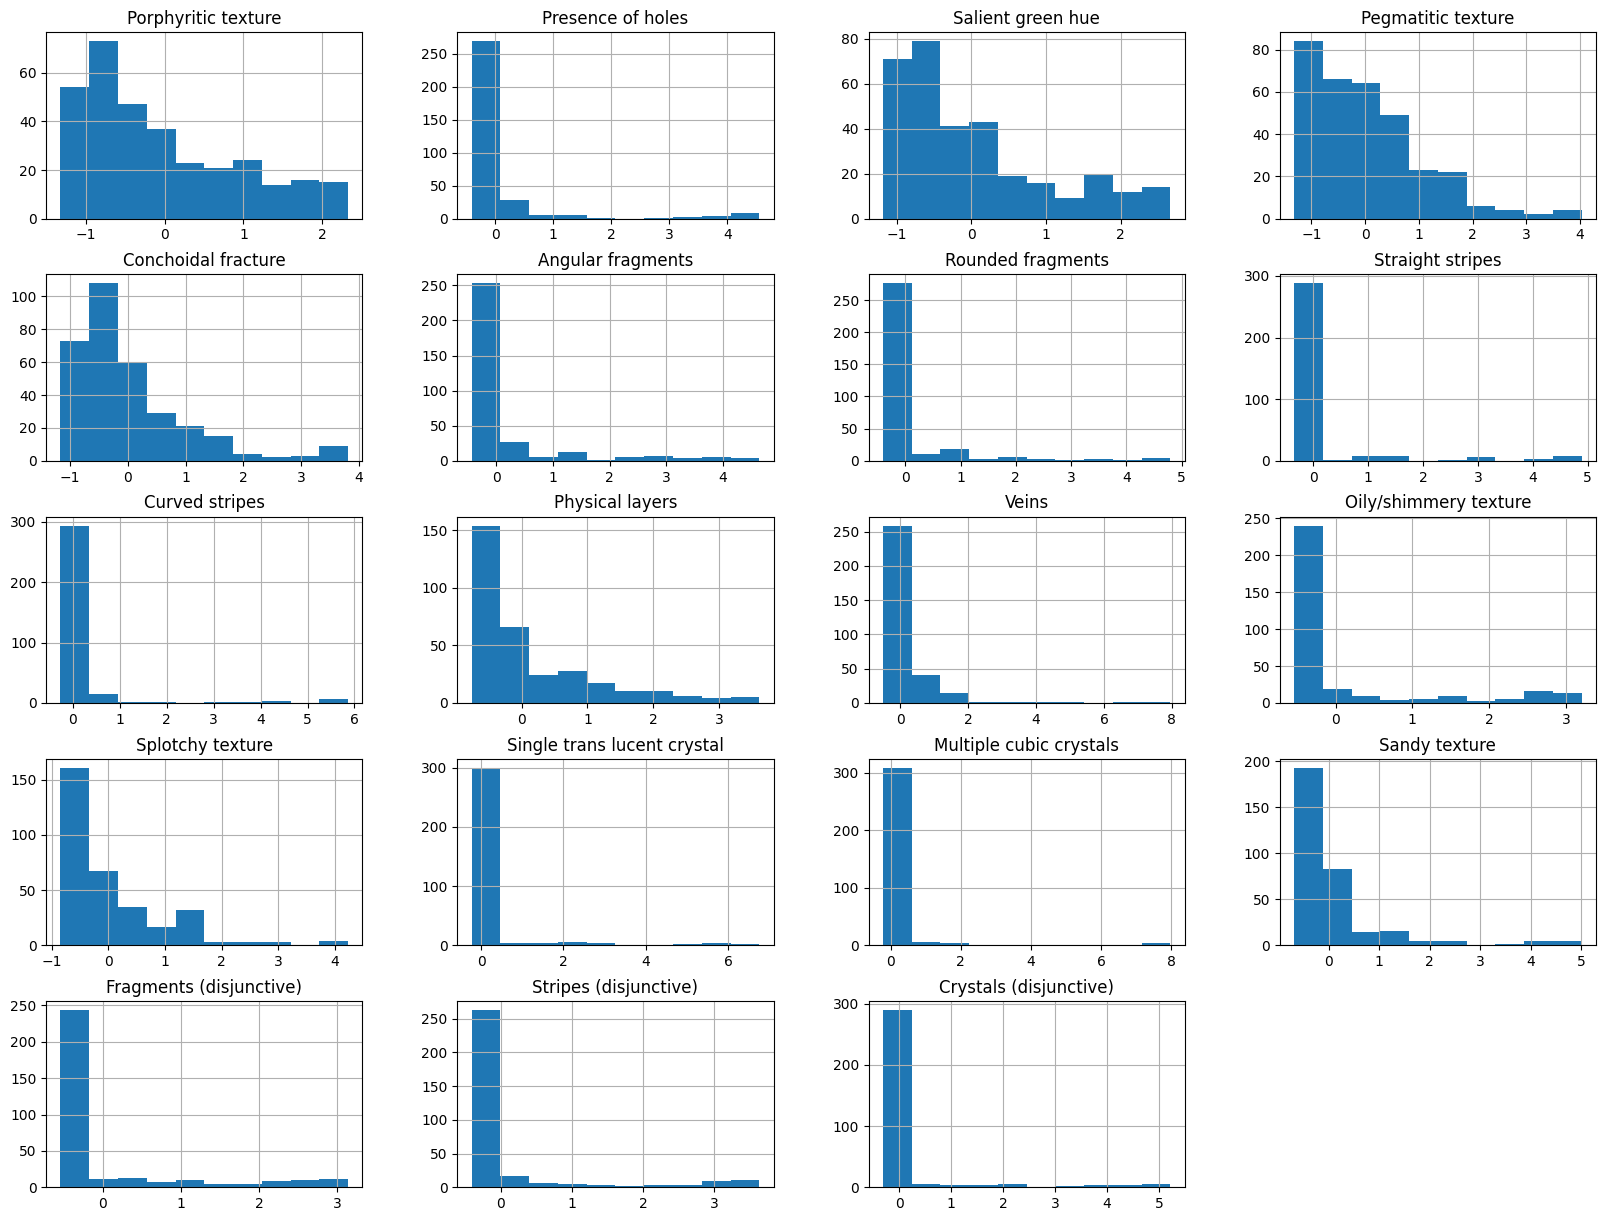

In [15]:
# Plotting the histogram of all the attributes of the Training dataset
X_train.hist(grid=True,figsize=(20,15))

array([[<Axes: title={'center': 'Porphyritic texture'}>,
        <Axes: title={'center': 'Presence of holes'}>,
        <Axes: title={'center': 'Salient green hue'}>,
        <Axes: title={'center': 'Pegmatitic texture'}>],
       [<Axes: title={'center': 'Conchoidal fracture'}>,
        <Axes: title={'center': 'Angular fragments'}>,
        <Axes: title={'center': 'Rounded fragments'}>,
        <Axes: title={'center': 'Straight stripes'}>],
       [<Axes: title={'center': 'Curved stripes'}>,
        <Axes: title={'center': 'Physical layers'}>,
        <Axes: title={'center': 'Veins'}>,
        <Axes: title={'center': 'Oily/shimmery texture'}>],
       [<Axes: title={'center': 'Splotchy texture'}>,
        <Axes: title={'center': 'Single trans lucent crystal'}>,
        <Axes: title={'center': 'Multiple cubic crystals'}>,
        <Axes: title={'center': 'Sandy texture'}>],
       [<Axes: title={'center': 'Fragments (disjunctive)'}>,
        <Axes: title={'center': 'Stripes (disjunctive

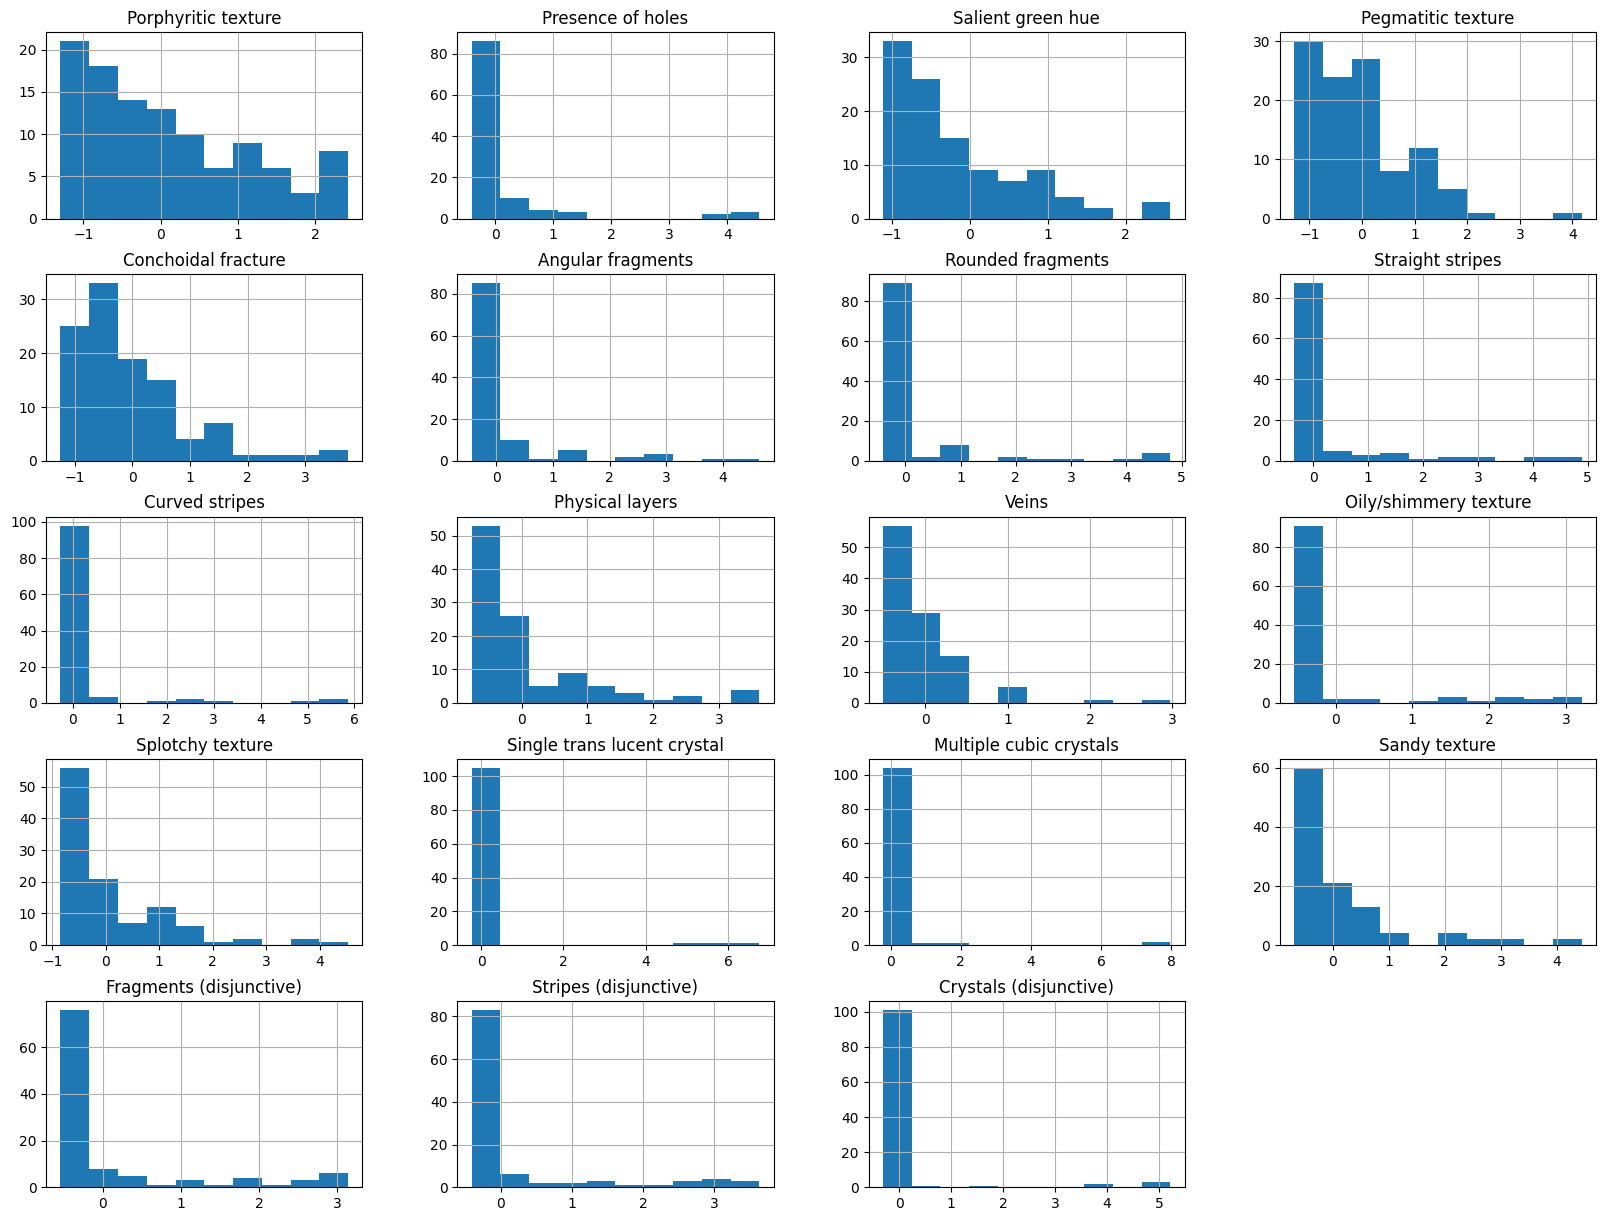

In [16]:
# Plotting the histogram of all the attributes of the Validation dataset
X_validation.hist(grid=True,figsize=(20,15))

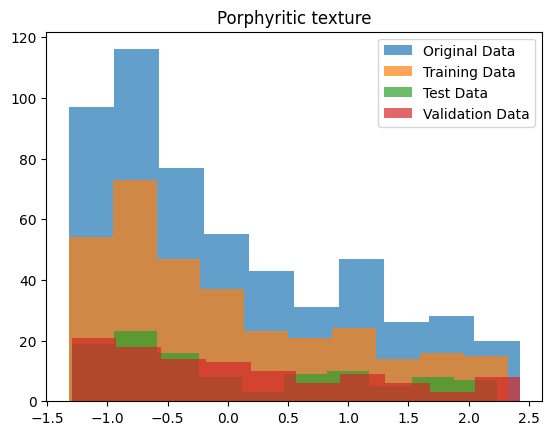

<Figure size 600x800 with 0 Axes>

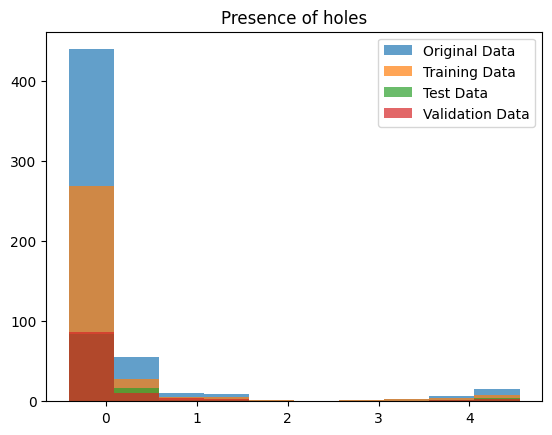

<Figure size 600x800 with 0 Axes>

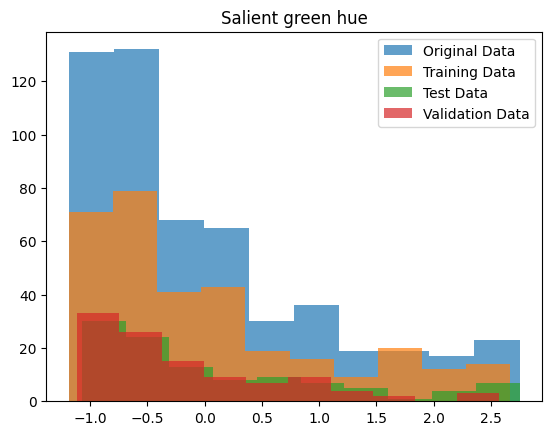

<Figure size 600x800 with 0 Axes>

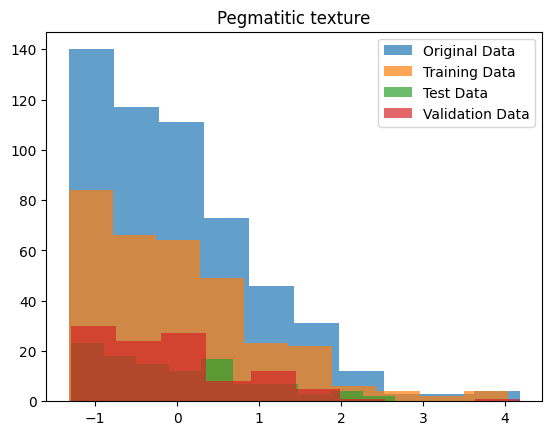

<Figure size 600x800 with 0 Axes>

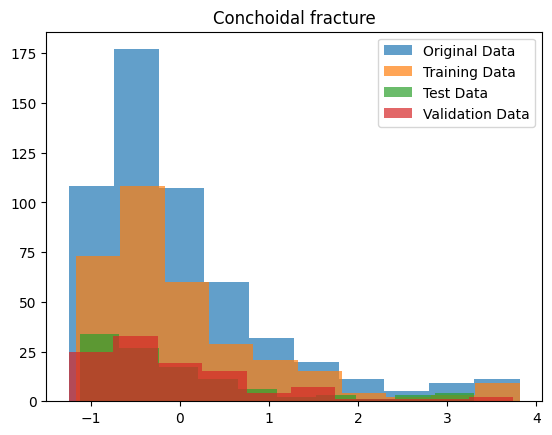

<Figure size 600x800 with 0 Axes>

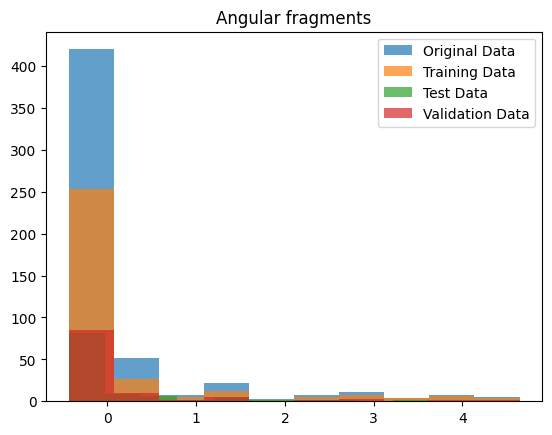

<Figure size 600x800 with 0 Axes>

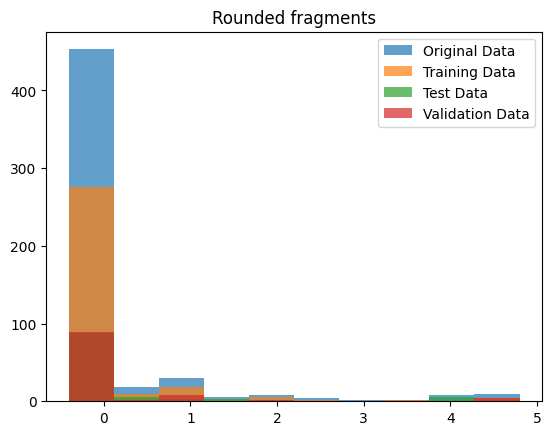

<Figure size 600x800 with 0 Axes>

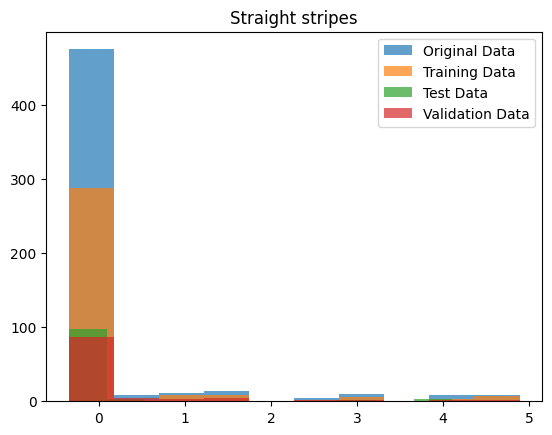

<Figure size 600x800 with 0 Axes>

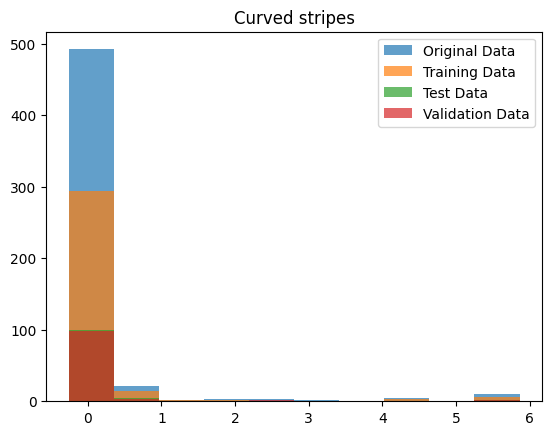

<Figure size 600x800 with 0 Axes>

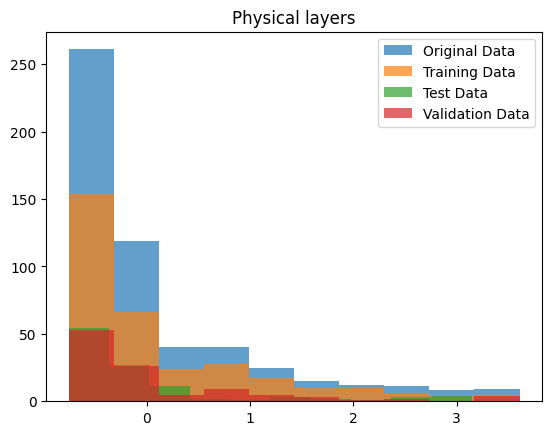

<Figure size 600x800 with 0 Axes>

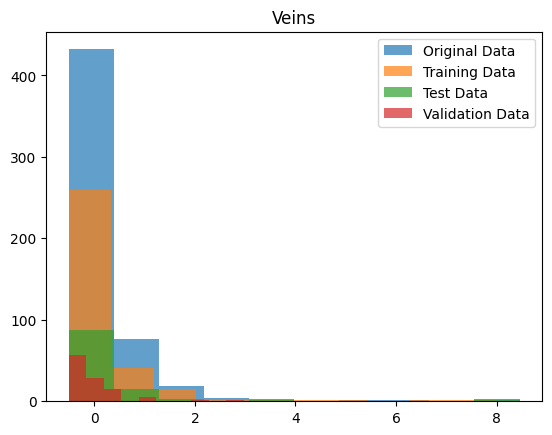

<Figure size 600x800 with 0 Axes>

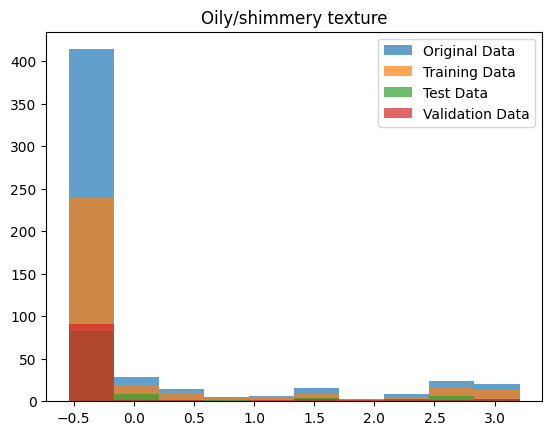

<Figure size 600x800 with 0 Axes>

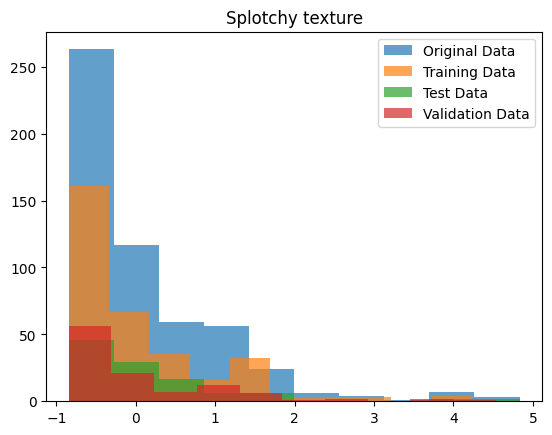

<Figure size 600x800 with 0 Axes>

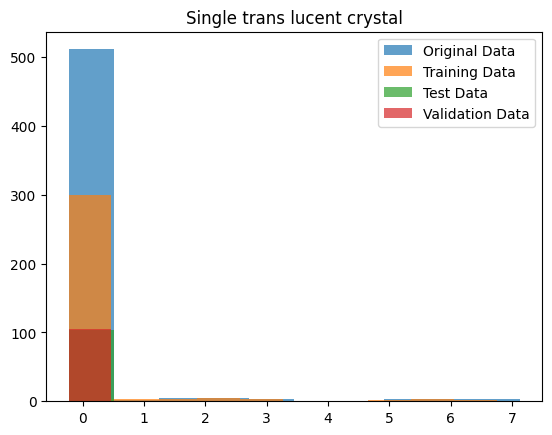

<Figure size 600x800 with 0 Axes>

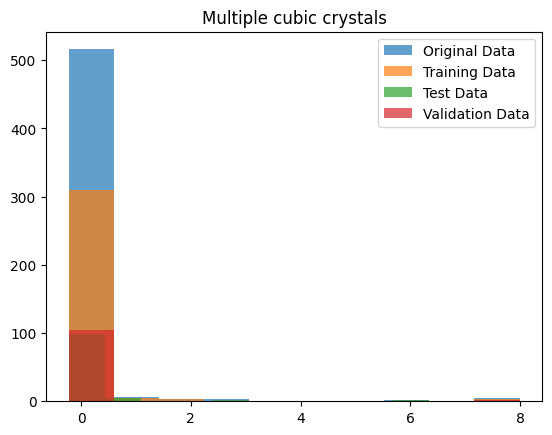

<Figure size 600x800 with 0 Axes>

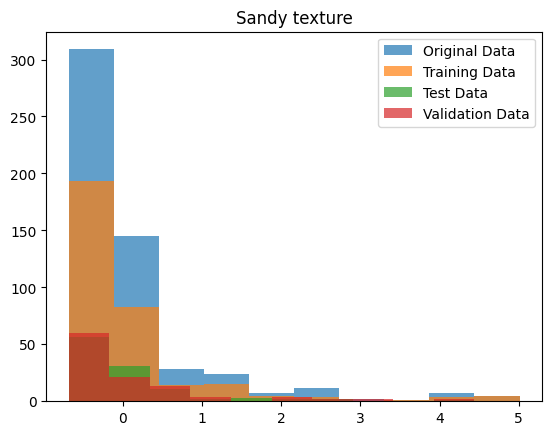

<Figure size 600x800 with 0 Axes>

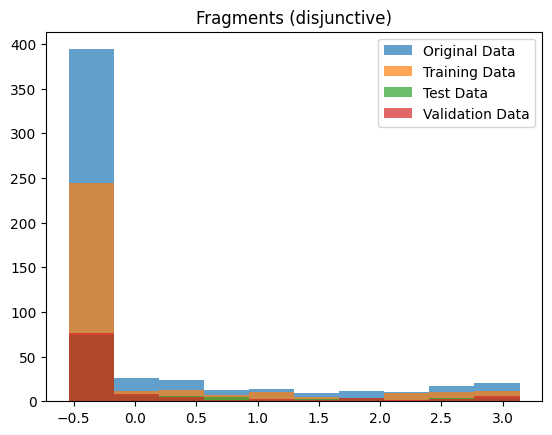

<Figure size 600x800 with 0 Axes>

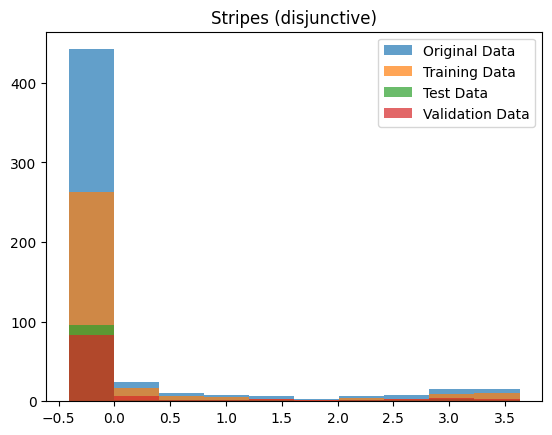

<Figure size 600x800 with 0 Axes>

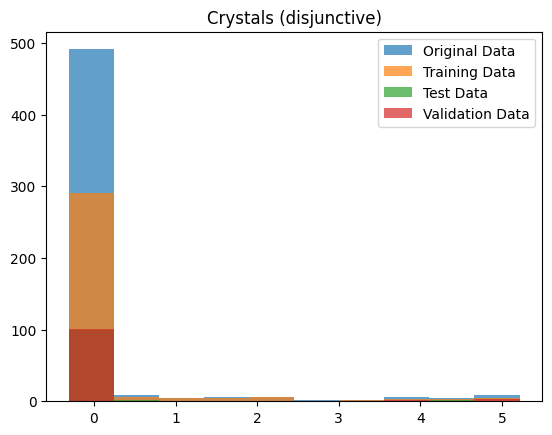

<Figure size 600x800 with 0 Axes>

In [17]:
# In order to verify whether the datasets are representative of the entire dataset
# Plotting histogram of every Column for Original, Test, Train & Validation data
for cols in feature_data.columns:
    fig, ax = plt.subplots()
    ax.hist(feature_data[cols], alpha = 0.7, label = "Original Data")
    ax.hist(X_train[cols], alpha = 0.7, label = "Training Data")
    ax.hist(X_test[cols], alpha = 0.7, label = "Test Data")
    ax.hist(X_validation[cols], alpha = 0.7, label = "Validation Data")
    ax.legend()
    plt.title(cols)
    plt.figure(figsize=(6,8))

## Answer 3
- The features & label data was divided into a 60%, 20% & 20% split for Trainig, Testing & Validating data respectively.
- We have plotted histograms for Traininng, Validation and Testing dataset, to verify whether it represents the entire dataset.
- After plotting the datasets for each attribute in the train, test, validation & original dataset, we can verify that the training, testing & validation datasets are representative of the entire dataset.

### Q.4 Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters (use markdown cells in Jupyter Notebook to clearly indicate each solution):
- Multinomial Logistic Regression (softmax regression); hyperparameters to explore: C, solver, max number of iterations.
- Support vector machines (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.
- Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node.


<h1> Multimonial Logistic regression</h1>

In [18]:
# Multimonial Logistic regression

# Define hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [ 1.75, 2.0, 2.25, 2.50, 2.75, 3.0, 4.0, 5.0],  # Regularization parameter
    'solver': ['lbfgs', 'sag', 'saga', 'newton-cholesky'],  # Optimization algorithm
    'max_iter': [500, 600, 800, 1000],  # Maximum number of iterations
}

# Create the logistic regression classifier
logistic_regression = LogisticRegression(multi_class = 'multinomial', random_state = 42)

# Grid search to find the best hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv = 7, scoring='accuracy', return_train_score = True)
grid_search.fit(X_train, y_train.values.ravel())

# Get the best hyperparameters
best_params = grid_search.best_params_
print("The best parameter are: ", best_params)
print("The accuracy score for the above parameters: ", grid_search.best_score_)

# Train the model with the best hyperparameters
best_logistic_regression = LogisticRegression(multi_class='multinomial', random_state=42, **best_params)
best_logistic_regression.fit(X_train, y_train.values.ravel())

# Validation set performance
y_val_pred = best_logistic_regression.predict(X_validation)
val_accuracy = accuracy_score(y_validation, y_val_pred)
val_precision = precision_score(y_validation, y_val_pred, average='weighted')
val_recall = recall_score(y_validation, y_val_pred, average='weighted')
val_f1 = f1_score(y_validation, y_val_pred, average='weighted')

# Print performance metrics
print("Validation Metrics:")
print(f"Accuracy  : {val_accuracy:.4f}")
print(f"Precision : {val_precision:.4f}")
print(f"Recall    : {val_recall:.4f}")
print(f"F1 Score  : {val_f1:.4f}")

The best parameter are:  {'C': 2.5, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
The accuracy score for the above parameters:  0.7064226245539844
Validation Metrics:
Accuracy  : 0.7222
Precision : 0.7275
Recall    : 0.7222
F1 Score  : 0.7237


### Using the above gridsearch a base line for the hyper parameter has been obtained which are:
- {'C': 2.5, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
- Using these hyper parameter values as reference, the model has been manually tuned up with following hyper parameters.

In [19]:
# Multimonial Logistic regression

# Finalizing the model with the best hyperparameters
final_logistic_regression = LogisticRegression(multi_class='multinomial', penalty = 'l1', C = 5, max_iter = 1000, 
                                               solver = 'saga', random_state = 42)
final_logistic_regression.fit(X_train, y_train.values.ravel())

# Validation set performance
y_val_pred = final_logistic_regression.predict(X_validation)
val_accuracy = accuracy_score(y_validation, y_val_pred)
val_precision = precision_score(y_validation, y_val_pred, average='weighted')
val_recall = recall_score(y_validation, y_val_pred, average='weighted')
val_f1 = f1_score(y_validation, y_val_pred, average='weighted')

# Print performance metrics
print("Validation Metrics:")
print(f"Accuracy  : {val_accuracy:.4f}")
print(f"Precision : {val_precision:.4f}")
print(f"Recall    : {val_recall:.4f}")
print(f"F1 Score  : {val_f1:.4f}")

# Test set performance
y_test_pred = final_logistic_regression.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print performance metrics
print("\nTest Metrics:")
print(f"Accuracy  : {test_accuracy:.4f}")
print(f"Precision : {test_precision:.4f}")
print(f"Recall    : {test_recall:.4f}")
print(f"F1 Score  : {test_f1:.4f}")

Validation Metrics:
Accuracy  : 0.7407
Precision : 0.7449
Recall    : 0.7407
F1 Score  : 0.7421

Test Metrics:
Accuracy  : 0.7315
Precision : 0.7334
Recall    : 0.7315
F1 Score  : 0.7300


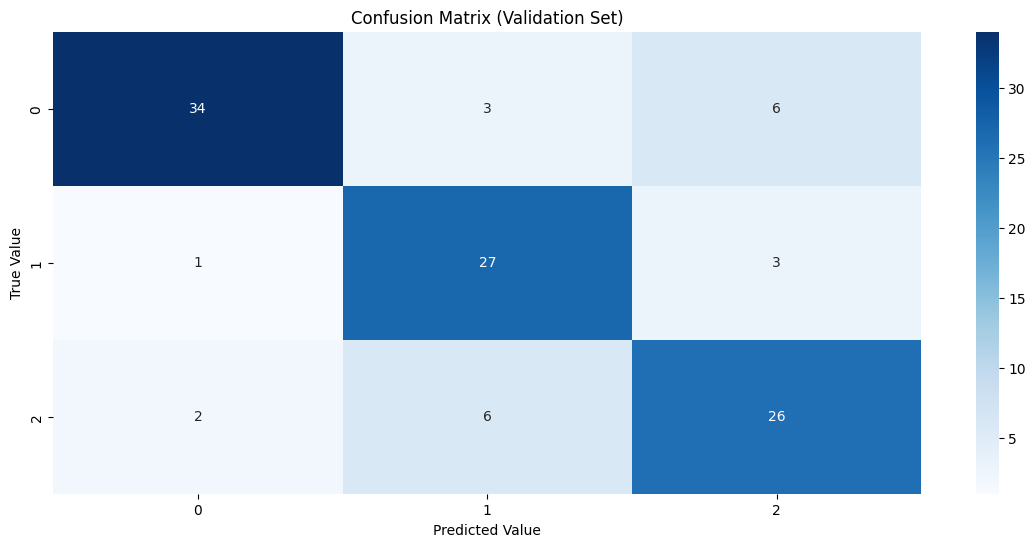

In [32]:
# Confusion Matrix

# Class labels
class_labels = [0, 1, 2]

# Plot confusion matrix heatmaps
plt.figure(figsize = (14, 6))
sns.heatmap(confusion_matrix(y_validation, y_val_pred), cmap = 'Blues', xticklabels = class_labels, yticklabels = class_labels, annot=True)
plt.title('Confusion Matrix (Validation Set)')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

plt.show()

### Comparison with the Grid Search Results:
1. After increasing the value of C and max iteration we can observe an increase in the accuracy of the model.
2. Value of C is generally increase when the model is underfitting.

<h1>Support Vector Machines</h1>

In [21]:
# Define hyperparameter grid
param_grid = {
    'C': [2.0, 3.0, 4.0, 5.0, 6.0],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'degree': [2, 3, 4],  # Degree of polynomial kernel (if applicable)
    'gamma': ['scale', 'auto', 0.01, 0.1, 1.0, 0.2],  # Kernel coefficient
}

# Create the SVM classifier
svm_classifier = SVC(random_state=42,probability=True)

# Grid search to find the best hyperparameters
grid_search_svm = GridSearchCV(svm_classifier, param_grid, cv=6, scoring='accuracy')
grid_search_svm.fit(X_train, y_train.values.ravel())

# Get the best hyperparameters
best_params_svm = grid_search_svm.best_params_
print("The Best parameter combination is: ", best_params_svm)
print("The accuracy score for the above parameters: ", grid_search_svm.best_score_)

# Train the model with the best hyperparameters
best_svm_classifier = SVC(random_state=42, **best_params_svm,probability=True)
best_svm_classifier.fit(X_train, y_train.values.ravel())

# Validation set performance
y_val_pred = best_svm_classifier.predict(X_validation)
val_accuracy = accuracy_score(y_validation, y_val_pred)
val_precision = precision_score(y_validation, y_val_pred, average='weighted')
val_recall = recall_score(y_validation, y_val_pred, average='weighted')
val_f1 = f1_score(y_validation, y_val_pred, average='weighted')

# Print performance metrics
print("Validation Metrics:")
print(f"Accuracy  : {val_accuracy:.4f}")
print(f"Precision : {val_precision:.4f}")
print(f"Recall    : {val_recall:.4f}")
print(f"F1 Score  : {val_f1:.4f}")

The Best parameter combination is:  {'C': 2.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
The accuracy score for the above parameters:  0.7438271604938271
Validation Metrics:
Accuracy  : 0.7963
Precision : 0.8023
Recall    : 0.7963
F1 Score  : 0.7978


### Using the above gridsearch a base line for the hyper parameter has been obtained which are:
- {'C': 2.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
- Using these hyper parameter values as reference, the model has been manually tuned up with following hyper parameters.

In [22]:
from sklearn.svm import SVC

# Finalizing the model with the best hyperparameters
final_svm_classifier = SVC(random_state = 42, C = 5.5, degree = 2, gamma = 'scale', kernel = 'rbf', probability = True)
final_svm_classifier.fit(X_train, y_train.values.ravel())

# Validation set performance
y_val_pred = final_svm_classifier.predict(X_validation)
val_accuracy = accuracy_score(y_validation, y_val_pred)
val_precision = precision_score(y_validation, y_val_pred, average='weighted')
val_recall = recall_score(y_validation, y_val_pred, average='weighted')
val_f1 = f1_score(y_validation, y_val_pred, average='weighted')

# Print performance metrics
print("Validation Metrics:")
print(f"Accuracy  : {val_accuracy:.4f}")
print(f"Precision : {val_precision:.4f}")
print(f"Recall    : {val_recall:.4f}")
print(f"F1 Score  : {val_f1:.4f}")

# Test set performance
y_test_pred = final_svm_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print performance metrics
print("\nTest Metrics:")
print(f"Accuracy  : {test_accuracy:.4f}")
print(f"Precision : {test_precision:.4f}")
print(f"Recall    : {test_recall:.4f}")
print(f"F1 Score  : {test_f1:.4f}")

Validation Metrics:
Accuracy  : 0.8148
Precision : 0.8246
Recall    : 0.8148
F1 Score  : 0.8167

Test Metrics:
Accuracy  : 0.7870
Precision : 0.7916
Recall    : 0.7870
F1 Score  : 0.7862


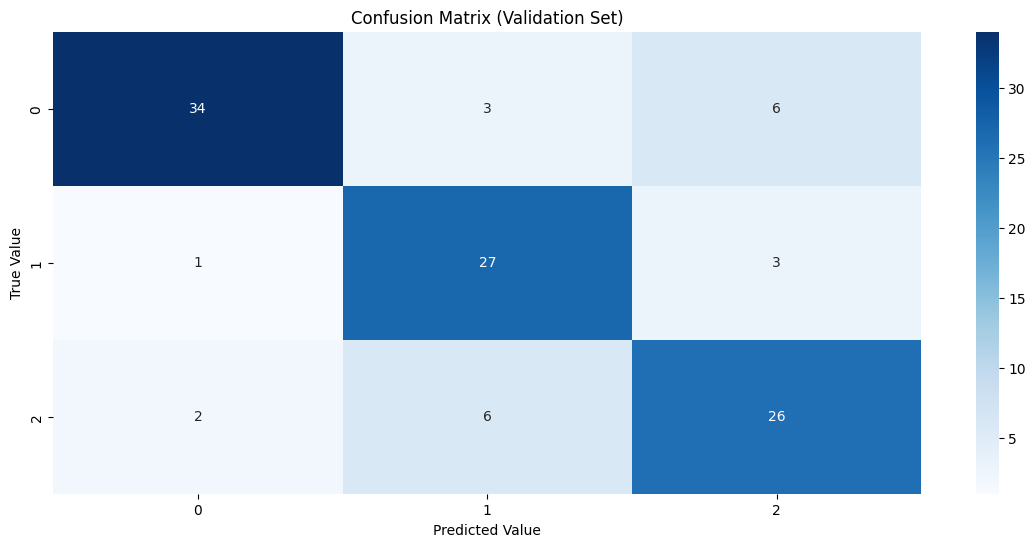

In [31]:
# Confusion Matrix

# Class labels
class_labels = [0, 1, 2]

# Plot confusion matrix heatmaps
plt.figure(figsize = (14, 6))
sns.heatmap(confusion_matrix(y_validation, y_val_pred), cmap = 'Blues', xticklabels = class_labels, yticklabels = class_labels, annot=True)
plt.title('Confusion Matrix (Validation Set)')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

plt.show()

### Comparison with the Grid Search Results:
- Except C all parameters remain the same
- But an increase in the value of C has significantly improves the accuracy of the model.
- This is often done when we want to increase the regularization or when the model is Underfitting.

<h1>Random Forrest Classifier</h1>

In [24]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 110, 120, 130, 140, 150, 160, 170, 180],  # Number of trees
    'max_depth': [7, 8, 9, 10, 11, 12],  # Maximum depth of trees
    'min_samples_split': [3, 4, 5, 6],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required at leaf nodes
}

# Create the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Grid search to find the best hyperparameters
grid_search_rf = GridSearchCV(random_forest, param_grid, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train, y_train.values.ravel())

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_
print ("Best Parameters are: ", best_params_rf)
print("The accuracy score for the above parameters: ", grid_search_rf.best_score_)

# Train the model with the best hyperparameters
best_random_forest = RandomForestClassifier(random_state=42, **best_params_rf)
best_random_forest.fit(X_train, y_train.values.ravel())

# Validation set performance
y_val_pred = best_random_forest.predict(X_validation)
val_accuracy = accuracy_score(y_validation, y_val_pred)
val_precision = precision_score(y_validation, y_val_pred, average='weighted')
val_recall = recall_score(y_validation, y_val_pred, average='weighted')
val_f1 = f1_score(y_validation, y_val_pred, average='weighted')

# Print performance metrics
print("Validation Metrics:")
print(f"Accuracy  : {val_accuracy:.4f}")
print(f"Precision : {val_precision:.4f}")
print(f"Recall    : {val_recall:.4f}")
print(f"F1 Score  : {val_f1:.4f}")

Best Parameters are:  {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 130}
The accuracy score for the above parameters:  0.7407407407407408
Validation Metrics:
Accuracy  : 0.7870
Precision : 0.7960
Recall    : 0.7870
F1 Score  : 0.7879


### Using the above gridsearch a base line for the hyper parameter has been obtained which are:
- {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 130}
- Using these hyper parameter values as reference, the model has been manually tuned up with following hyper parameters.

In [25]:
# Finalizing the model with the best hyperparameters
final_random_forest = RandomForestClassifier(random_state = 42, max_depth = 7, min_samples_leaf = 1, 
                                             min_samples_split = 4, n_estimators = 160)
final_random_forest.fit(X_train, y_train.values.ravel())

# Validation set performance
y_val_pred = final_random_forest.predict(X_validation)
val_accuracy = accuracy_score(y_validation, y_val_pred)
val_precision = precision_score(y_validation, y_val_pred, average='weighted')
val_recall = recall_score(y_validation, y_val_pred, average='weighted')
val_f1 = f1_score(y_validation, y_val_pred, average='weighted')

# Print performance metrics
print("Validation Metrics:")
print(f"Accuracy  : {val_accuracy:.4f}")
print(f"Precision : {val_precision:.4f}")
print(f"Recall    : {val_recall:.4f}")
print(f"F1 Score  : {val_f1:.4f}")

# Test set performance
y_test_pred = final_random_forest.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print performance metrics
print("\nTest Metrics:")
print(f"Accuracy  : {test_accuracy:.4f}")
print(f"Precision : {test_precision:.4f}")
print(f"Recall    : {test_recall:.4f}")
print(f"F1 Score  : {test_f1:.4f}")

Validation Metrics:
Accuracy  : 0.8056
Precision : 0.8150
Recall    : 0.8056
F1 Score  : 0.8070

Test Metrics:
Accuracy  : 0.6759
Precision : 0.6772
Recall    : 0.6759
F1 Score  : 0.6765


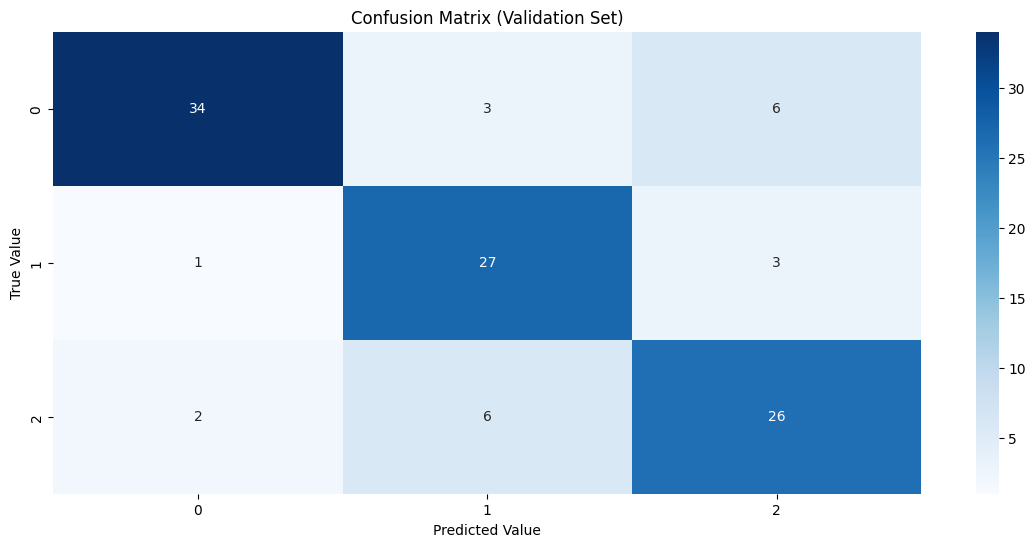

In [33]:
# Confusion Matrix

# Class labels
class_labels = [0, 1, 2]

# Plot confusion matrix heatmaps
plt.figure(figsize = (14, 6))
sns.heatmap(confusion_matrix(y_validation, y_val_pred), cmap = 'Blues', xticklabels = class_labels, yticklabels = class_labels, annot=True)
plt.title('Confusion Matrix (Validation Set)')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

plt.show()

### Compared to the Grid Search results: 
1. Increasing or decreasing the max_depth reduced the accuracy of the Validation Data.
2. Increasing the min_samples_leaf reduces the accuracy for the model
3. Increasing the min_samples_split to 4 & n_estimators to 160 provides the highest accuracy.
4. The accuracy reduces if either of the hyper parameters is changed.
5. Therefore, the parameters that provide the highest accuracy are:  <b>{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 160}</b>

### Question 5
- Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set (try to get above 80% accuracy). Once you have found a good one, try it on the test set. Describe and discuss your findings.

In [27]:
# Create the ensemble of classifiers
ensemble_classifier_hard = VotingClassifier(
    estimators=[
        ('logistic_regression', best_logistic_regression),
        ('svm_classifier', final_svm_classifier),
        ('random_forest', final_random_forest)
    ],
    voting='hard'  # Use majority voting
)

# Train the ensemble on the training data
ensemble_classifier_hard.fit(X_train, y_train.values.ravel())

# Evaluate the ensemble on the validation set
y_val_ensemble_pred = ensemble_classifier_hard.predict(X_validation)
val_ensemble_accuracy = accuracy_score(y_validation, y_val_ensemble_pred)
val_ensemble_precision = precision_score(y_validation, y_val_ensemble_pred, average='weighted')
val_ensemble_recall = recall_score(y_validation, y_val_ensemble_pred, average='weighted')
val_ensemble_f1 = f1_score(y_validation, y_val_ensemble_pred, average='weighted')

# Print Validation Data metrics
print(f"Validation Data Metrics:")
print(f"Accuracy  : {val_ensemble_accuracy:.4f}")
print(f"Precision : {val_ensemble_precision:.4f}")
print(f"Recall    : {val_ensemble_recall:.4f}")
print(f"F1 Score  : {val_ensemble_f1:.4f}")

# Evaluate the ensemble on the test set
y_test_ensemble_pred = ensemble_classifier_hard.predict(X_test)
test_ensemble_accuracy = accuracy_score(y_test, y_test_ensemble_pred)
test_ensemble_precision = precision_score(y_test, y_test_ensemble_pred, average='weighted')
test_ensemble_recall = recall_score(y_test, y_test_ensemble_pred, average='weighted')
test_ensemble_f1 = f1_score(y_test, y_test_ensemble_pred, average='weighted')

# Print Test Data metrics
print(f"\nTest Data Metrics:")
print(f"Accuracy  : {test_ensemble_accuracy:.4f}")
print(f"Precision : {test_ensemble_precision:.4f}")
print(f"Recall    : {test_ensemble_recall:.4f}")
print(f"F1 Score  : {test_ensemble_f1:.4f}")

Validation Data Metrics:
Accuracy  : 0.8241
Precision : 0.8375
Recall    : 0.8241
F1 Score  : 0.8264

Test Data Metrics:
Accuracy  : 0.7407
Precision : 0.7422
Recall    : 0.7407
F1 Score  : 0.7387


In [28]:
# Create the ensemble of classifiers
ensemble_classifier_soft = VotingClassifier(
    estimators=[
        ('logistic_regression', best_logistic_regression),
        ('svm_classifier', best_svm_classifier),
        ('random_forest', final_random_forest)
    ],
    voting = 'soft',  # Use soft voting
    flatten_transform = True,  # Enable probability estimation
)

# Train the ensemble on the training data
ensemble_classifier_soft.fit(X_train, y_train.values.ravel())

# Evaluate the ensemble on the validation set
y_val_ensemble_pred = ensemble_classifier_soft.predict(X_validation)
val_ensemble_accuracy = accuracy_score(y_validation, y_val_ensemble_pred)
val_ensemble_precision = precision_score(y_validation, y_val_ensemble_pred, average='weighted')
val_ensemble_recall = recall_score(y_validation, y_val_ensemble_pred, average='weighted')
val_ensemble_f1 = f1_score(y_validation, y_val_ensemble_pred, average='weighted')

# Print Validation Data metrics
print(f"Validation Data Metrics: ")
print(f"Accuracy  : {val_ensemble_accuracy:.4f}")
print(f"Precision : {val_ensemble_precision:.4f}")
print(f"Recall    : {val_ensemble_recall:.4f}")
print(f"F1 Score  : {val_ensemble_f1:.4f}")

# Evaluate the ensemble on the test set
y_test_ensemble_pred = ensemble_classifier_soft.predict(X_test)
test_ensemble_accuracy = accuracy_score(y_test, y_test_ensemble_pred)
test_ensemble_precision = precision_score(y_test, y_test_ensemble_pred, average='weighted')
test_ensemble_recall = recall_score(y_test, y_test_ensemble_pred, average='weighted')
test_ensemble_f1 = f1_score(y_test, y_test_ensemble_pred, average='weighted')

# Print Test Data metrics
print(f"\nTest Accuracy:")
print(f"Accuracy  : {test_ensemble_accuracy:.4f}")
print(f"Precision : {test_ensemble_precision:.4f}")
print(f"Recall    : {test_ensemble_recall:.4f}")
print(f"F1 Score  : {test_ensemble_f1:.4f}")

Validation Data Metrics: 
Accuracy  : 0.7870
Precision : 0.8022
Recall    : 0.7870
F1 Score  : 0.7899

Test Accuracy:
Accuracy  : 0.7500
Precision : 0.7559
Recall    : 0.7500
F1 Score  : 0.7471


### Answer 5
As seen from the above 2 ensembles
1. Hard Ensemble
   - The Hard Ensemble is able to predict the Validation set with a 82%+ accuracy.
   - This Accuracy is more than every individual classifier i.e. 82.41%.
2. Soft Ensemble
   - The Soft Ensemble is unable to predict the Validation set with a 80% accuracy, as it takes an average of all the 3 classifiers.
   - The Soft Accuracy is being reduced due to the low Accuracy of Multinomial Logistic Regression.
3. Therefore, we can conclude that the Hard Voting Ensemble is a better choice compared to the Soft Voting Ensemble.
4. We can observe that for the Hard Voting Ensemble, there is a substantial difference between the Validation & Test accuracy.
5. The cause of this situation is that we've trained all the models and fine-tuned the hyperparameters using the validation data.
6. As a result, we can conclude that both the individual models and the ensemble are exhibiting overfitting tendencies to the validation data, and they are not effectively generalizing when it comes to the test data.
7. The Accuracy for Validation & Test data is pretty close to each other, due to which we could say that the soft voting ensemble model generalizes better than the hard voting ensemble.